#### ESERCIZIO 10.1
Nella classe _Random_ è stato aggiunto un metodo _initialize_: esso diversifica il generatore di numeri casuali in base al processo che lo invoca.  
Il codice dell'esercizio 9.1 è stato adattato alla codificazione in parallelo, e si osserva un miglioramento rispetto alla codificazione sequenziale.  
Infatti, nel caso di 34 città sulla circonfernza unitaria, attraverso codificazione parallela (utilizzando 8 processi) si ha una convergenza alla soluzione migliore in 90 generazioni, a parità di _individui_ nella _popolazione_; in codificazione sequenziale si raggiunge la soluzione migliore in 136 _generazioni_.  
Rispetto all'esercizio 9.1, come condizione di uscita viene impostato un numero fissato di generazioni.

Per sfruttare la codificazione in parallelo, ogni 10 _generazioni_ il processo 0 raccoglie i migliori _percorsi_ dagli altri processi, elabora il migliore tra _gli inviati_ e lo rimanda indietro, così gli altri processi aggiornano il proprio miglior _percorso_.

#### ESERCIZIO 10.2
Rispetto alla libreria "ingiro.h" utilizzata nell'esercitazione 9,  
sono stati aggiunti due costruttori alternativi per la classe _Genetica_ e _Mappa_, cosicché crare una mappa caricando le coordinate da file.

Il codice precedente viene appplicato al caso dei 110 capoluoghi di provincia italiani, ma data la complessità del problema si sono riscontarte delle difficoltà: il codice spesso tendeva a bloccarsi in dei _minimi locali_. Per migliorare la convergenza dell'algoritmo, sono state provate diverse probabilità di mutazione e di selezione, diverse _frequenze di comunicazione_ tra i processi, varî numeri di _individui_ nella _popolazione_ e di processi.

Per questo caso più complicato, la frequenza con cui i processi si scambiano il loro miglior _percorso_ non rimane costante. Per le prime duecento _generazioni_ i processi si scambiano informazioni ogni 10 _generazioni_, per le cento successive ogni 20, dopo trecento _generazioni_ ogni 40 e dopo quattrocento _generazioni_ la comunicazione avvieno ogni 50 _generazioni_.

L'idea dietro questa scelta è che scambiarsi informazioni è un processo dispendioso, ma è soprattutto utile all'inizio della ricerca.  
I processi "si aiutano a vicenda" per convergere un po' più velocente. Dopo un certo numero di _generazioni_ si presume che tutti i processi stiano convergendo allo stesso percorso minimo, quindi la comunicazione può avvenire meno frequentemente.



**Specifiche:**

No. processi: $10 $     
No. individui nella popolazione:  $2500$  
No. generazioni:  $2000$  
Prob. _crossover_:  $95\%$  
Prob. _shift_:  $10\%$  
Prob. _m-permutazioni contigue_:  $10\%$  
Prob. _permutazione semplice_:  $10\%$  
Prob. _inversione_:  $10\%$ 

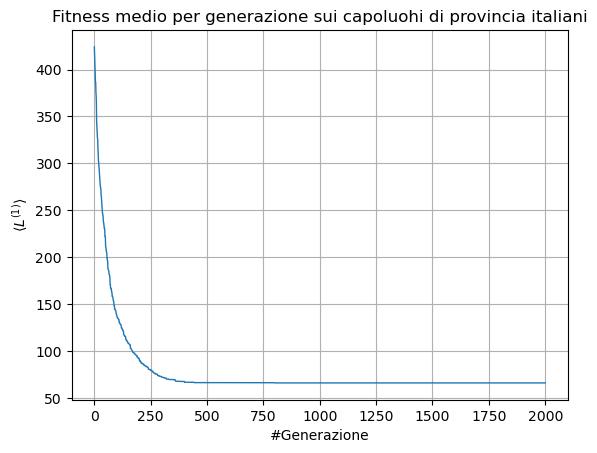

Il percorso più breve che è stato trovato è di 66.0554


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Carica i dati
def takeData(file_path):
    dati = []  # Lista per contenere i dati letti
    try:
        with open(file_path, 'r') as file:
            for riga in file:
                # Separa i dati utilizzando uno spazio come delimitatore
                dati_riga = riga.strip().split()
                
                # Converte i primi due dati in float e aggiunge alla lista dati
                if len(dati_riga) >= 2:  # Assicura che ci siano almeno 2 elementi
                    dati_float = [float(dato) for dato in dati_riga[:2]]
                    dati.append(dati_float)
                
    except FileNotFoundError:
        print(f"Errore: il file {file_path} non esiste.")
    except Exception as e:
        print(f"Errore durante la lettura del file: {e}")

    # Converte la lista di liste in un array NumPy
    return np.array(dati)

# Carica i dati per il cerchio
dati_italia = takeData('Best_process0.dat')
gen = dati_italia[:, 0]  # Prima colonna
dist = dati_italia[:, 1]  # Seconda colonna


# Grafico per il fitness medio per generazione per i dati del cerchio nel primo subplot
plt.plot(gen, dist, linewidth=1)
plt.xlabel("#Generazione")
plt.ylabel(r"$\langle L^{(1)} \rangle$")
plt.title("Fitness medio per generazione sui capoluohi di provincia italiani")
plt.grid(True)


# Mostra i grafici
plt.show()
print("Il percorso più breve che è stato trovato è di " +  str(dist[-1]))

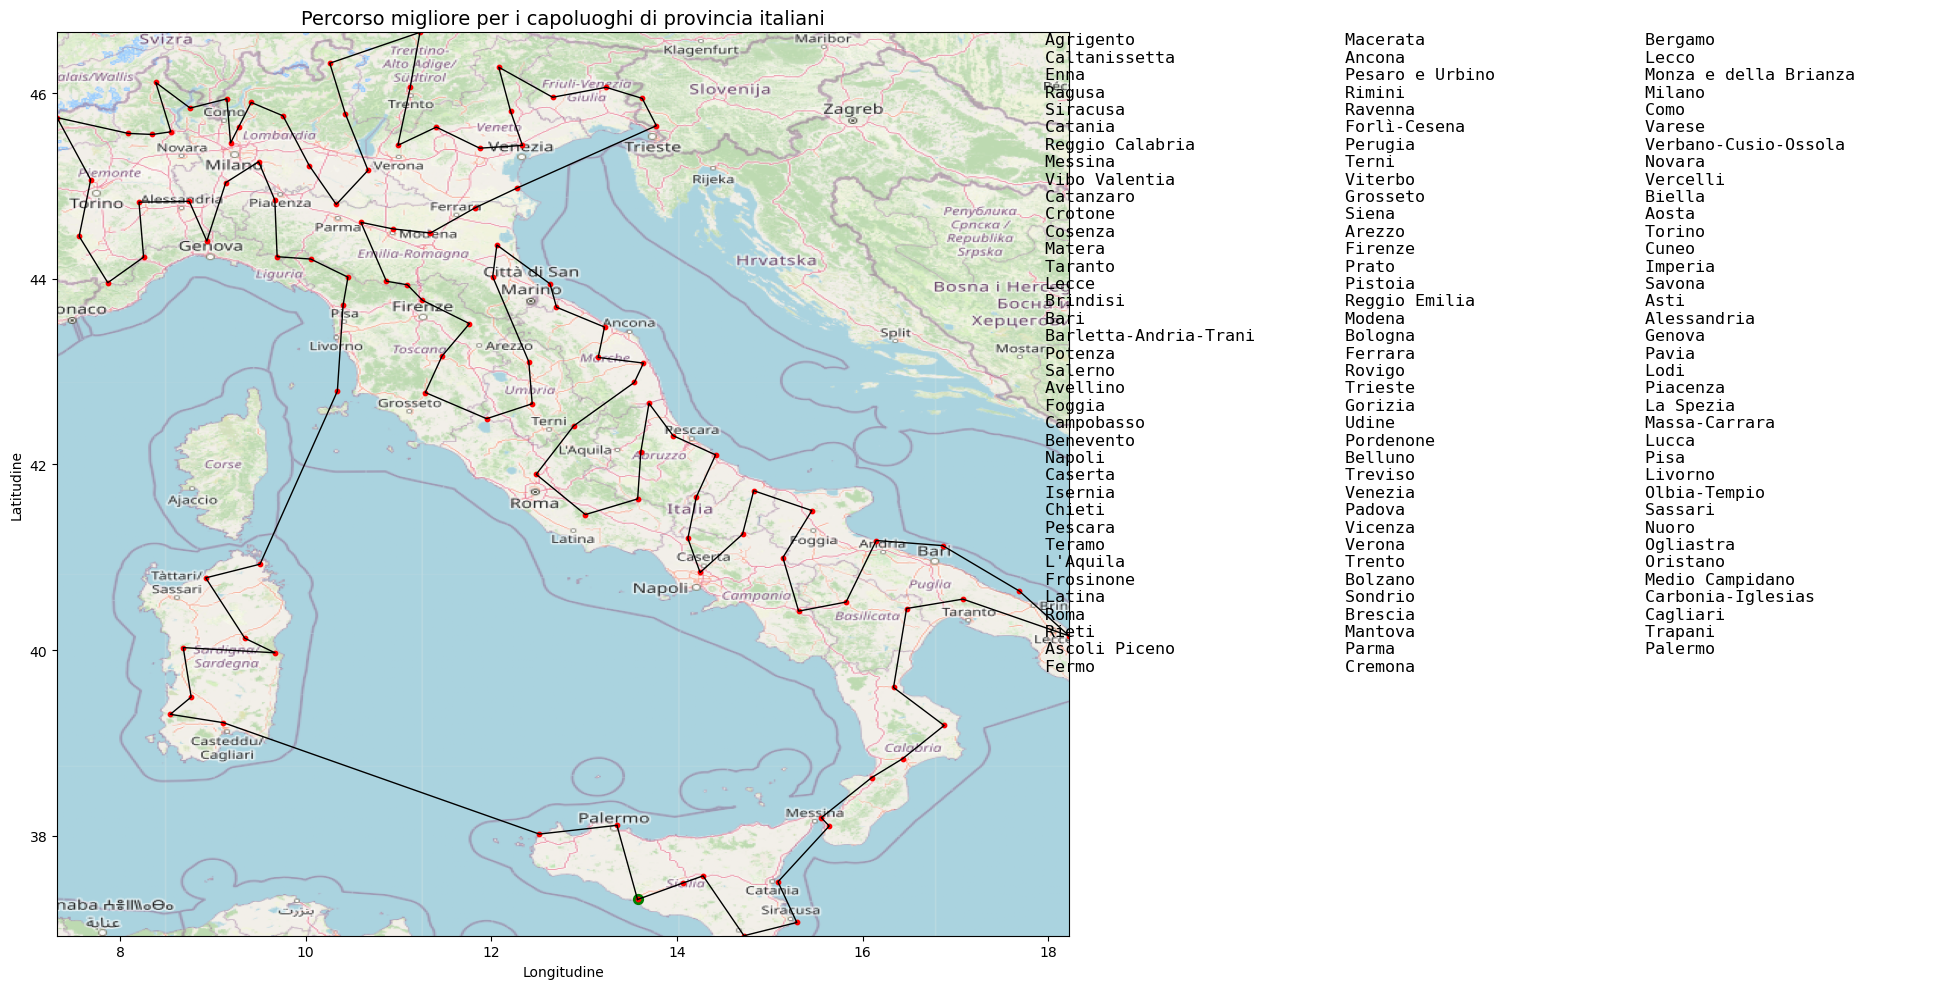

In [4]:
import pandas as pd
import matplotlib.gridspec as gridspec

# Funzione per caricare il percorso
def carica_percorso(file):
    percorso = []
    with open(file, 'r') as f:
        for line in f:
            citta = int(line.strip())
            percorso.append(citta)
    return percorso

# Funzione per caricare i dati delle coordinate
def takeData(file):
    return np.loadtxt(file)

# Funzione per caricare l'elenco delle città
def carica_citta(file):
    return pd.read_csv(file, header=None)[0].tolist()

# Carica i dati delle coordinate
coord = takeData('cap_prov_ita.dat')
x = coord[:, 0]  # Prima colonna
y = coord[:, 1]  # Seconda colonna

# Carica il percorso
percorso = carica_percorso('percorso_italia.dat')

# Carica l'elenco delle città
citta = carica_citta('prov_ita.txt')

# Ordina l'elenco delle città secondo il percorso
citta_ordinate = [citta[i] for i in percorso]

# Carica l'immagine di sfondo
ruh_m = plt.imread('ITALIA.png')

# Creazione della figura con gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# Area del grafico
ax = fig.add_subplot(gs[0])

# Percorso basato sulle coordinate
percorso_coord = [(x[i], y[i]) for i in percorso]
px, py = zip(*percorso_coord)
ax.plot(px, py, color='black', linewidth=1)
ax.plot([px[-1], px[0]], [py[-1], py[0]], color='black', linewidth=1)

# Plot delle città
ax.scatter(x[0], y[0], zorder=1, alpha=1, c='g', s=50, label='Pt. di partenza')
ax.scatter(x, y, c='r', s=10)

# Configurazione del titolo e delle etichette
ax.set_title('Percorso migliore per i capoluoghi di provincia italiani', fontsize=14)
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')

# Immagine di sfondo
BBox = (np.min(x), np.max(x), np.min(y), np.max(y))
ax.imshow(ruh_m, zorder=0, extent=BBox, aspect='equal')

# Area del testo
ax_text = fig.add_subplot(gs[1])

# Rimozione degli assi
ax_text.axis('off')

# Dividi l'elenco delle città ordinate in tre colonne
num_colonne = 3
righe_per_colonna = (len(citta_ordinate) + num_colonne - 1) // num_colonne
colonne = [citta_ordinate[i*righe_per_colonna:(i+1)*righe_per_colonna] for i in range(num_colonne)]

# Creazione del testo da visualizzare in colonne verticali
testo = ""
for i in range(righe_per_colonna):
    for col in colonne:
        if i < len(col):
            testo += f"{col[i]:<30}"  # Aggiusta l'allineamento secondo le tue necessità
        else:
            testo += " " * 30  # Spazio vuoto per le celle mancanti
    testo += "\n"

# Aggiungi il testo all'area del testo
ax_text.text(0, 1, testo, ha='left', va='top', fontsize=12, family='monospace')

# Mostra il grafico
plt.tight_layout()
plt.show()


#### N.B.:
Osservando il percorso tracciato sulla mappa, si può subito notare che il percoso compiuto in Sardegna non è effettivamente il più breve, altrettanto nella parte dell'Italia settentrionale. 
Tuttavia, non sembra ci si discosti troppo dal risultato migliore.